# Notebook to make Figure 10

In [ ]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap

import seaborn as sns
cp = sns.color_palette('muted')
cp2 = sns.color_palette('pastel')

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_SNRs/'

### Setup

Load data

In [1]:
# Load in JSDs
JS_vs_time = h5ify.load(data_dir+'JSDs_different_RD_SNRs.h5')
JS_vs_time_conditioned = h5ify.load(data_dir+'JSDs_conditioned_different_RD_SNRs.h5')

Set up plotting aesthetics

In [2]:
# custom colormap 
cmap = LinearSegmentedColormap.from_list("my_cmap", [cp[0], cp2[2], cp[8] , cp2[3], cp[3]])

# cutoff times 
tcuts_M = JS_vs_time['SNR 100']['chi_p']['tcuts_M']

In [3]:
JS_vs_time_conditioned

{'SNR 100': array([1.83904296e-01, 1.42124901e-01, 1.38476812e-01, 5.39892386e-02,
        1.81826804e-02, 3.01338494e-03, 1.28279866e-03, 1.15311228e-04]),
 'SNR 25': array([0.02831792, 0.01845736, 0.00245516, 0.00098356, 0.00114011,
        0.0007927 , 0.0001434 , 0.00017298])}

### Make Figure

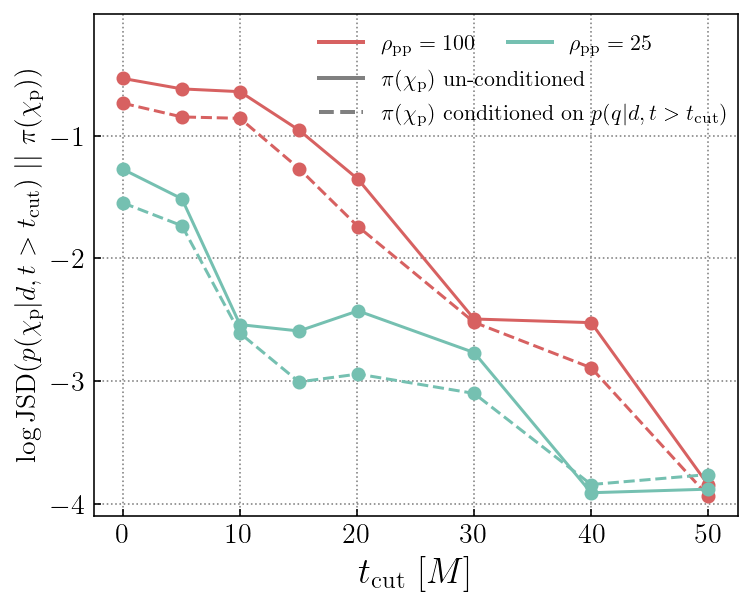

In [4]:
fig = plt.figure(figsize=(pf.DEFAULT_FIG_WIDTH/2, pf.DEFAULT_FIG_WIDTH/2.5))

plt.plot(tcuts_M, np.log10(JS_vs_time['SNR 100']['chi_p']['JS_divs']), zorder=3, color=cmap(0.99), marker='o')
plt.plot(tcuts_M, np.log10(JS_vs_time_conditioned['SNR 100']), zorder=3, color=cmap(0.99), marker='o', ls='--')

plt.plot(tcuts_M, np.log10(JS_vs_time['SNR 25']['chi_p']['JS_divs']), zorder=3, color=cmap(1/6), marker='o')
plt.plot(tcuts_M, np.log10(JS_vs_time_conditioned['SNR 25']), zorder=3, color=cmap(1/6), marker='o', ls='--')

plt.xlabel(r'$t_\mathrm{cut}~[M]$')
plt.ylabel(r'$\log \mathrm{{JSD}}(p(\chi_{\rm p}| d, t>t_\mathrm{{cut}})~||~ \pi(\chi_{\rm p}))$', fontsize=14)

handles1 = [
    Line2D([], [], color=cmap(0.99), label=r'$\rho_{\rm pp}=100$'),
    Line2D([], [], color=cmap(1/6), label=r'$\rho_{\rm pp}=25$')
]
handles2 = [
    Line2D([], [], color='gray', label=r'$\pi(\chi_{\rm p})$ un-conditioned'),
    Line2D([], [], color='gray', ls='--', label=r'$\pi(\chi_{\rm p})$ conditioned on $p(q| d, t>t_{\rm cut})$')
]

leg1 = plt.legend(handles=handles1, handlelength=2, fontsize=11, ncol=2, columnspacing=1.5, loc='upper left', bbox_to_anchor=(0.32,1) )
leg2 = plt.legend(handles=handles2, handlelength=2, fontsize=11, loc='upper left', bbox_to_anchor=(0.32,0.93))

plt.gca().add_artist(leg1)

for i, h in enumerate(handles1):
    leg1.get_lines()[i].set_linewidth(2)

for i, h in enumerate(handles2):
    leg2.get_lines()[i].set_linewidth(2)
    
plt.ylim(-4.1, -0.01)
plt.savefig('figure_10.png', dpi=300, bbox_inches='tight')

plt.show()